In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 16:41:30-05:00,4.0,4.0,5.0,11.0,3.0,3.0,3.0,4.0,5.0,4.0,2.0,4.0,0.0
2023-10-05 16:42:00-05:00,4.0,4.0,5.0,22.0,2.0,3.0,3.0,4.0,4.0,2.0,5.0,4.0,0.0
2023-10-05 16:42:30-05:00,4.0,4.0,4.0,25.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,4.0,0.0
2023-10-05 16:43:00-05:00,3.0,4.0,4.0,12.0,2.0,5.0,4.0,4.0,3.0,4.0,3.0,4.0,0.0
2023-10-05 16:43:30-05:00,4.0,4.0,4.0,9.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,396.000000,414.000000,412.000000,399.000000,430.000000,421.000000,381.000000,451.000000,446.000000,422.000000,451.000000,461.000000,460.0
mean,2.916667,3.681159,9.682039,8.005013,3.523256,9.878860,3.028871,7.208426,7.878924,3.450237,8.250554,4.570499,0.0
std,0.733036,0.808420,6.759214,5.264365,2.060432,8.674926,0.712081,3.913057,5.748173,1.953409,7.469447,1.505756,0.0
min,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.0
25%,2.000000,3.000000,5.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,0.0
50%,3.000000,4.000000,7.000000,7.000000,3.000000,6.000000,3.000000,5.000000,4.000000,3.000000,4.000000,5.000000,0.0
75%,3.000000,4.000000,12.000000,11.000000,5.000000,15.000000,3.000000,11.000000,13.000000,4.000000,14.000000,6.000000,0.0
max,5.000000,5.000000,32.000000,26.000000,9.000000,35.000000,5.000000,17.000000,26.000000,9.000000,28.000000,9.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 16:41:30-05:00,17.0,17.0,21.0,46.0,13.0,13.0,13.0,17.0,21.0,17.0,9.0,17.0,0.0
2023-10-05 16:42:00-05:00,17.0,17.0,21.0,72.0,9.0,13.0,13.0,17.0,17.0,9.0,21.0,17.0,0.0
2023-10-05 16:42:30-05:00,17.0,17.0,17.0,79.0,13.0,13.0,13.0,17.0,17.0,13.0,9.0,17.0,0.0
2023-10-05 16:43:00-05:00,13.0,17.0,17.0,50.0,9.0,21.0,17.0,17.0,13.0,17.0,13.0,17.0,0.0
2023-10-05 16:43:30-05:00,17.0,17.0,17.0,38.0,13.0,13.0,13.0,21.0,13.0,17.0,13.0,17.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,396.000000,414.000000,412.000000,399.000000,430.000000,421.000000,381.000000,451.000000,446.000000,422.000000,451.000000,461.000000,460.0
mean,12.666667,15.724638,36.932039,32.152882,15.197674,36.377672,13.115486,29.844789,31.029148,14.900474,31.133038,19.373102,0.0
std,2.932144,3.233679,20.370420,18.366842,8.479813,26.296612,2.848323,15.358612,20.238389,8.049995,24.679457,6.200601,0.0
min,9.000000,9.000000,13.000000,9.000000,5.000000,9.000000,9.000000,13.000000,13.000000,0.000000,0.000000,9.000000,0.0
25%,9.000000,13.000000,21.000000,13.000000,9.000000,13.000000,13.000000,17.000000,17.000000,9.000000,9.000000,13.000000,0.0
50%,13.000000,17.000000,30.000000,30.000000,13.000000,25.000000,13.000000,21.000000,17.000000,13.000000,17.000000,21.000000,0.0
75%,13.000000,17.000000,50.000000,46.000000,21.000000,58.000000,13.000000,46.000000,53.000000,17.000000,55.000000,25.000000,0.0
max,21.000000,21.000000,93.000000,81.000000,38.000000,100.000000,21.000000,62.000000,81.000000,38.000000,85.000000,38.000000,0.0


## Histograms

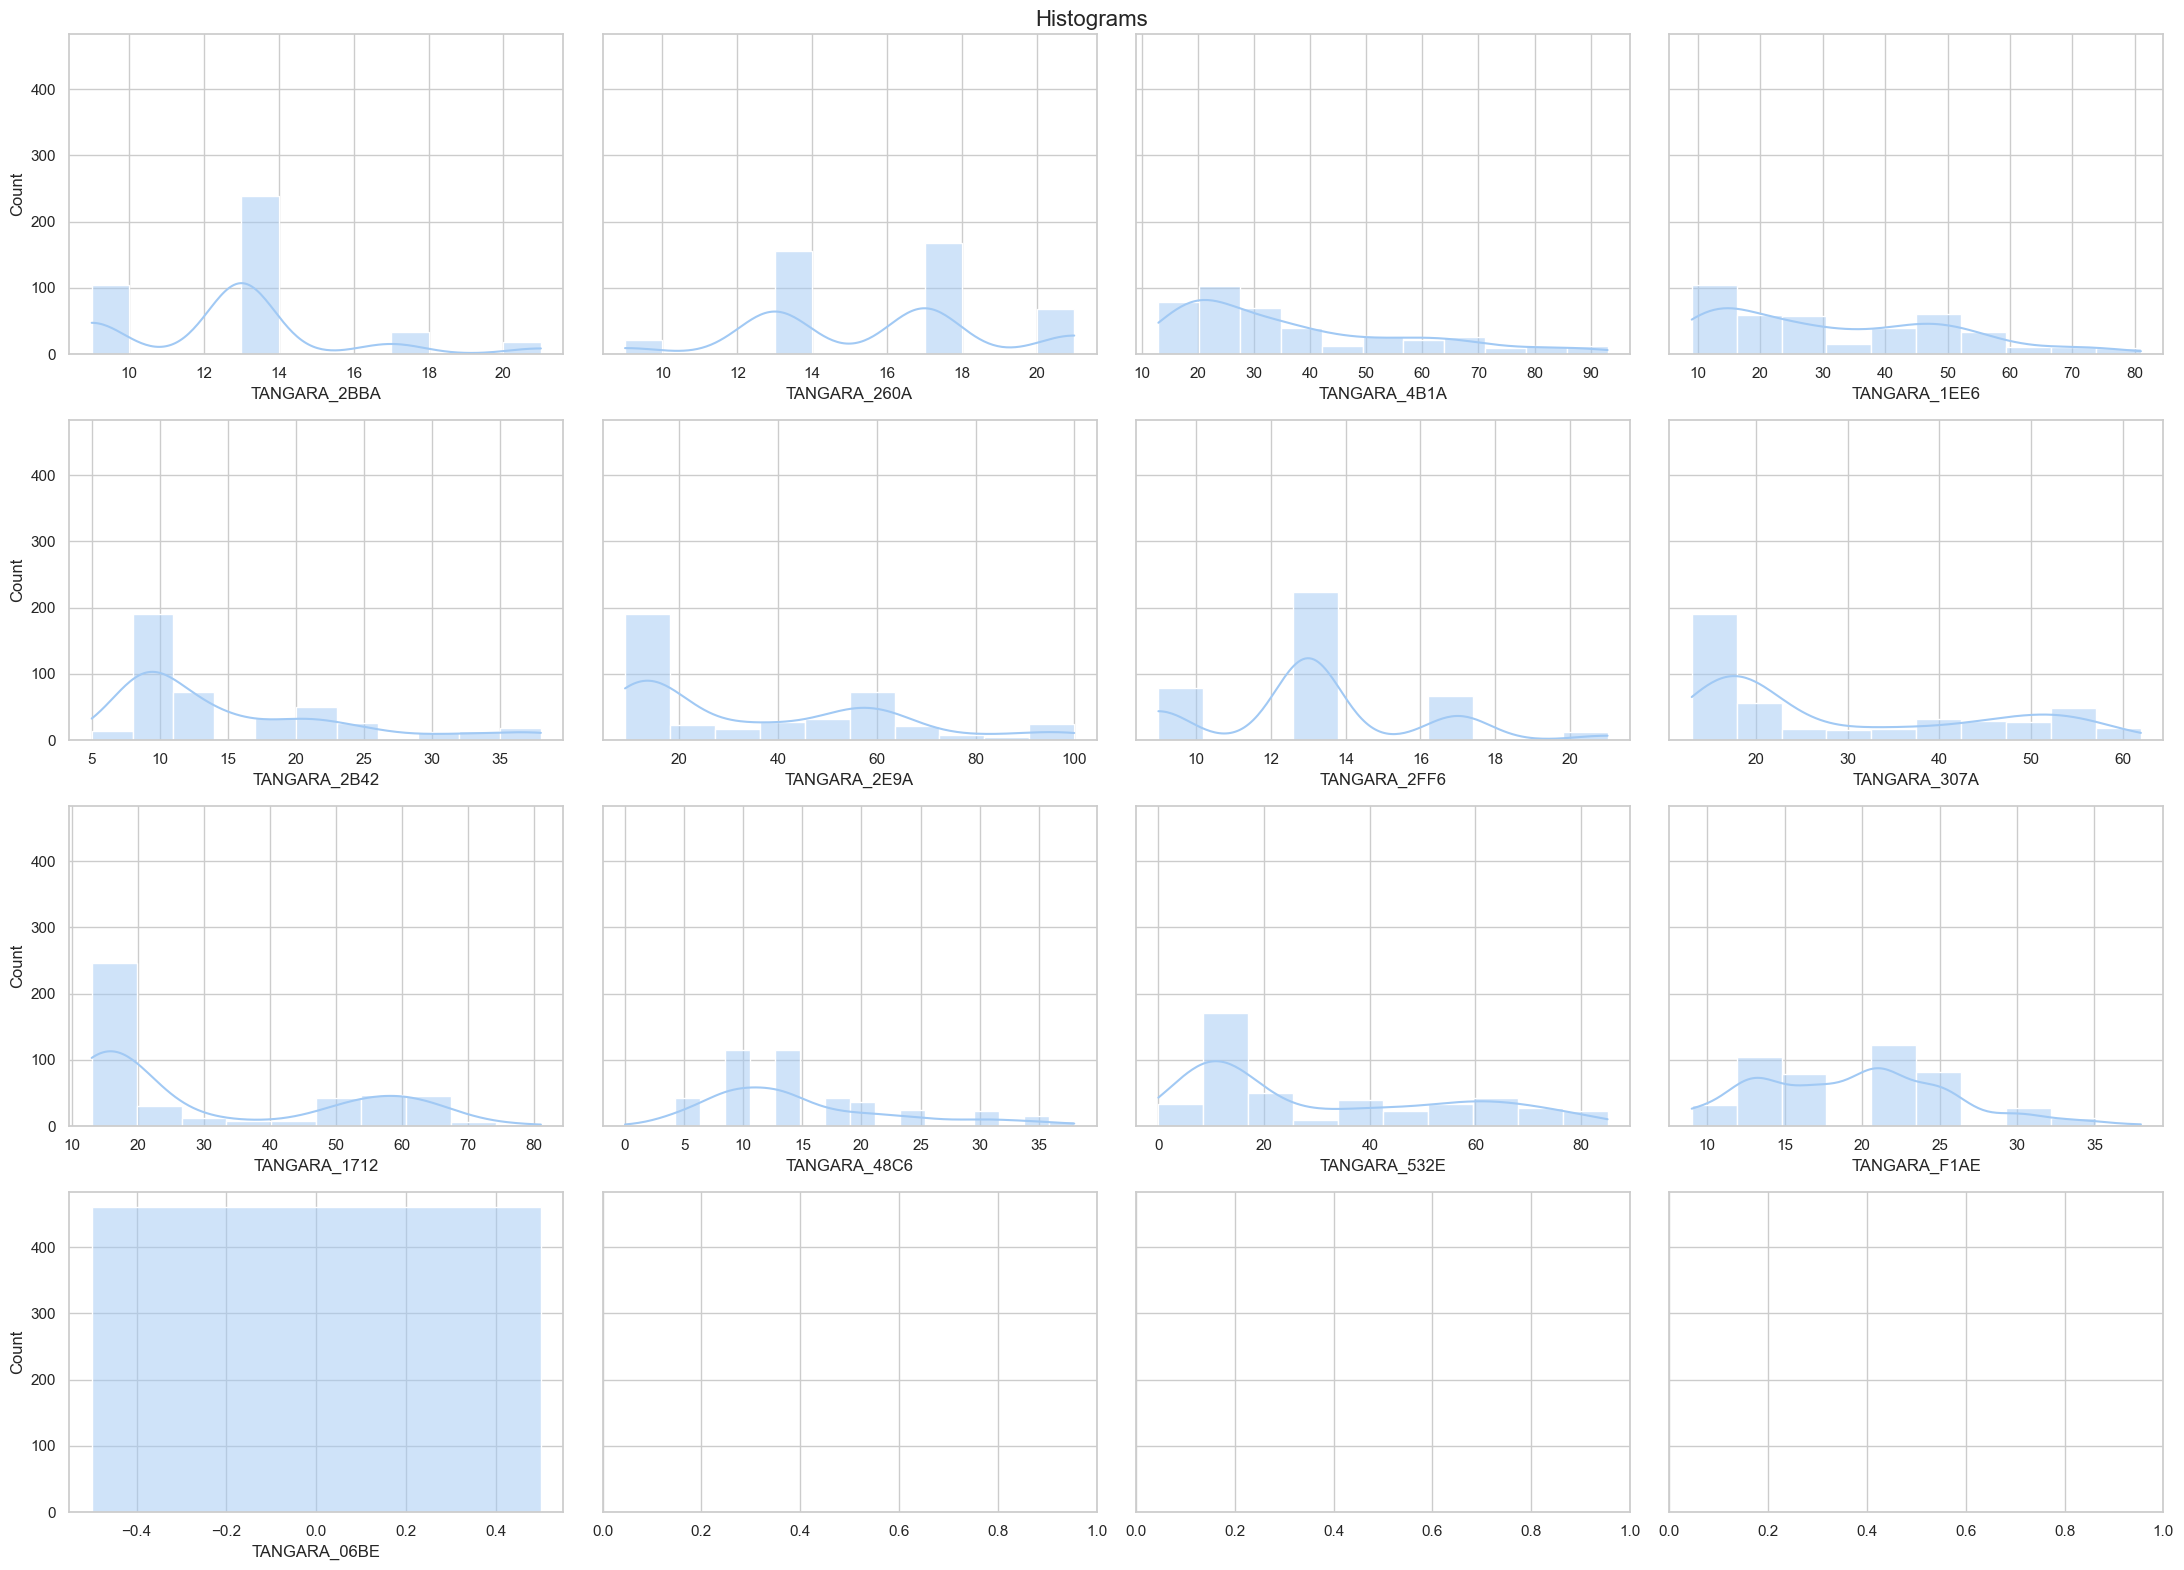

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

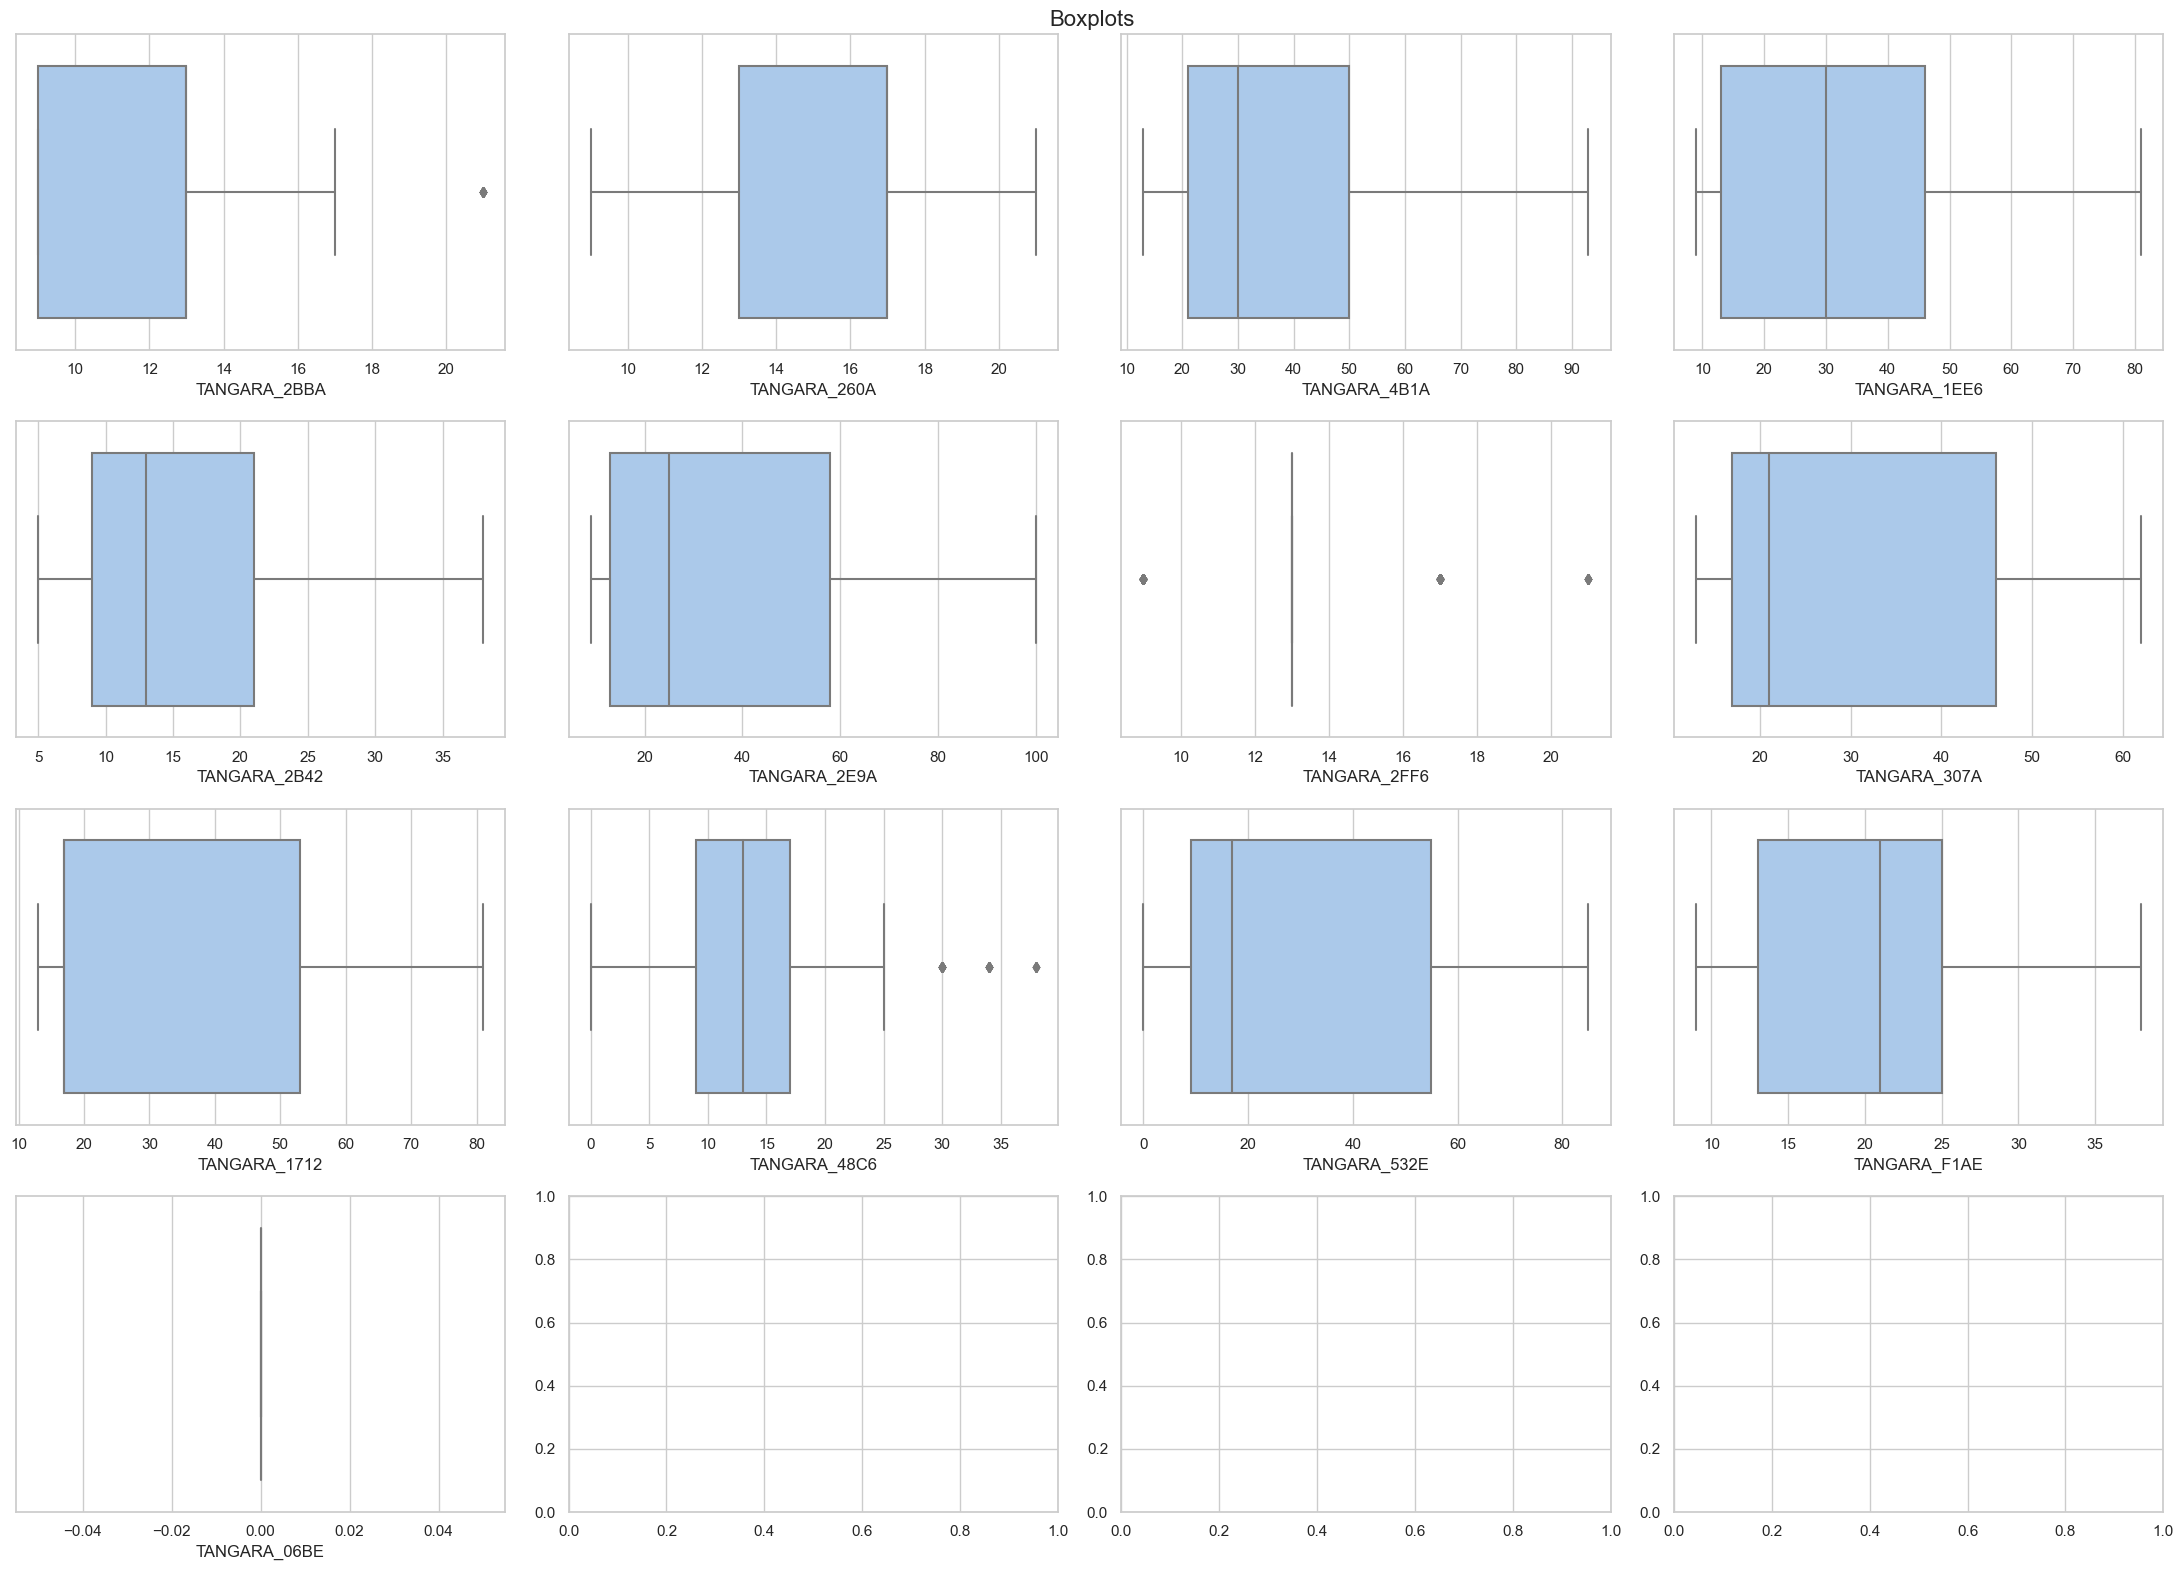

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

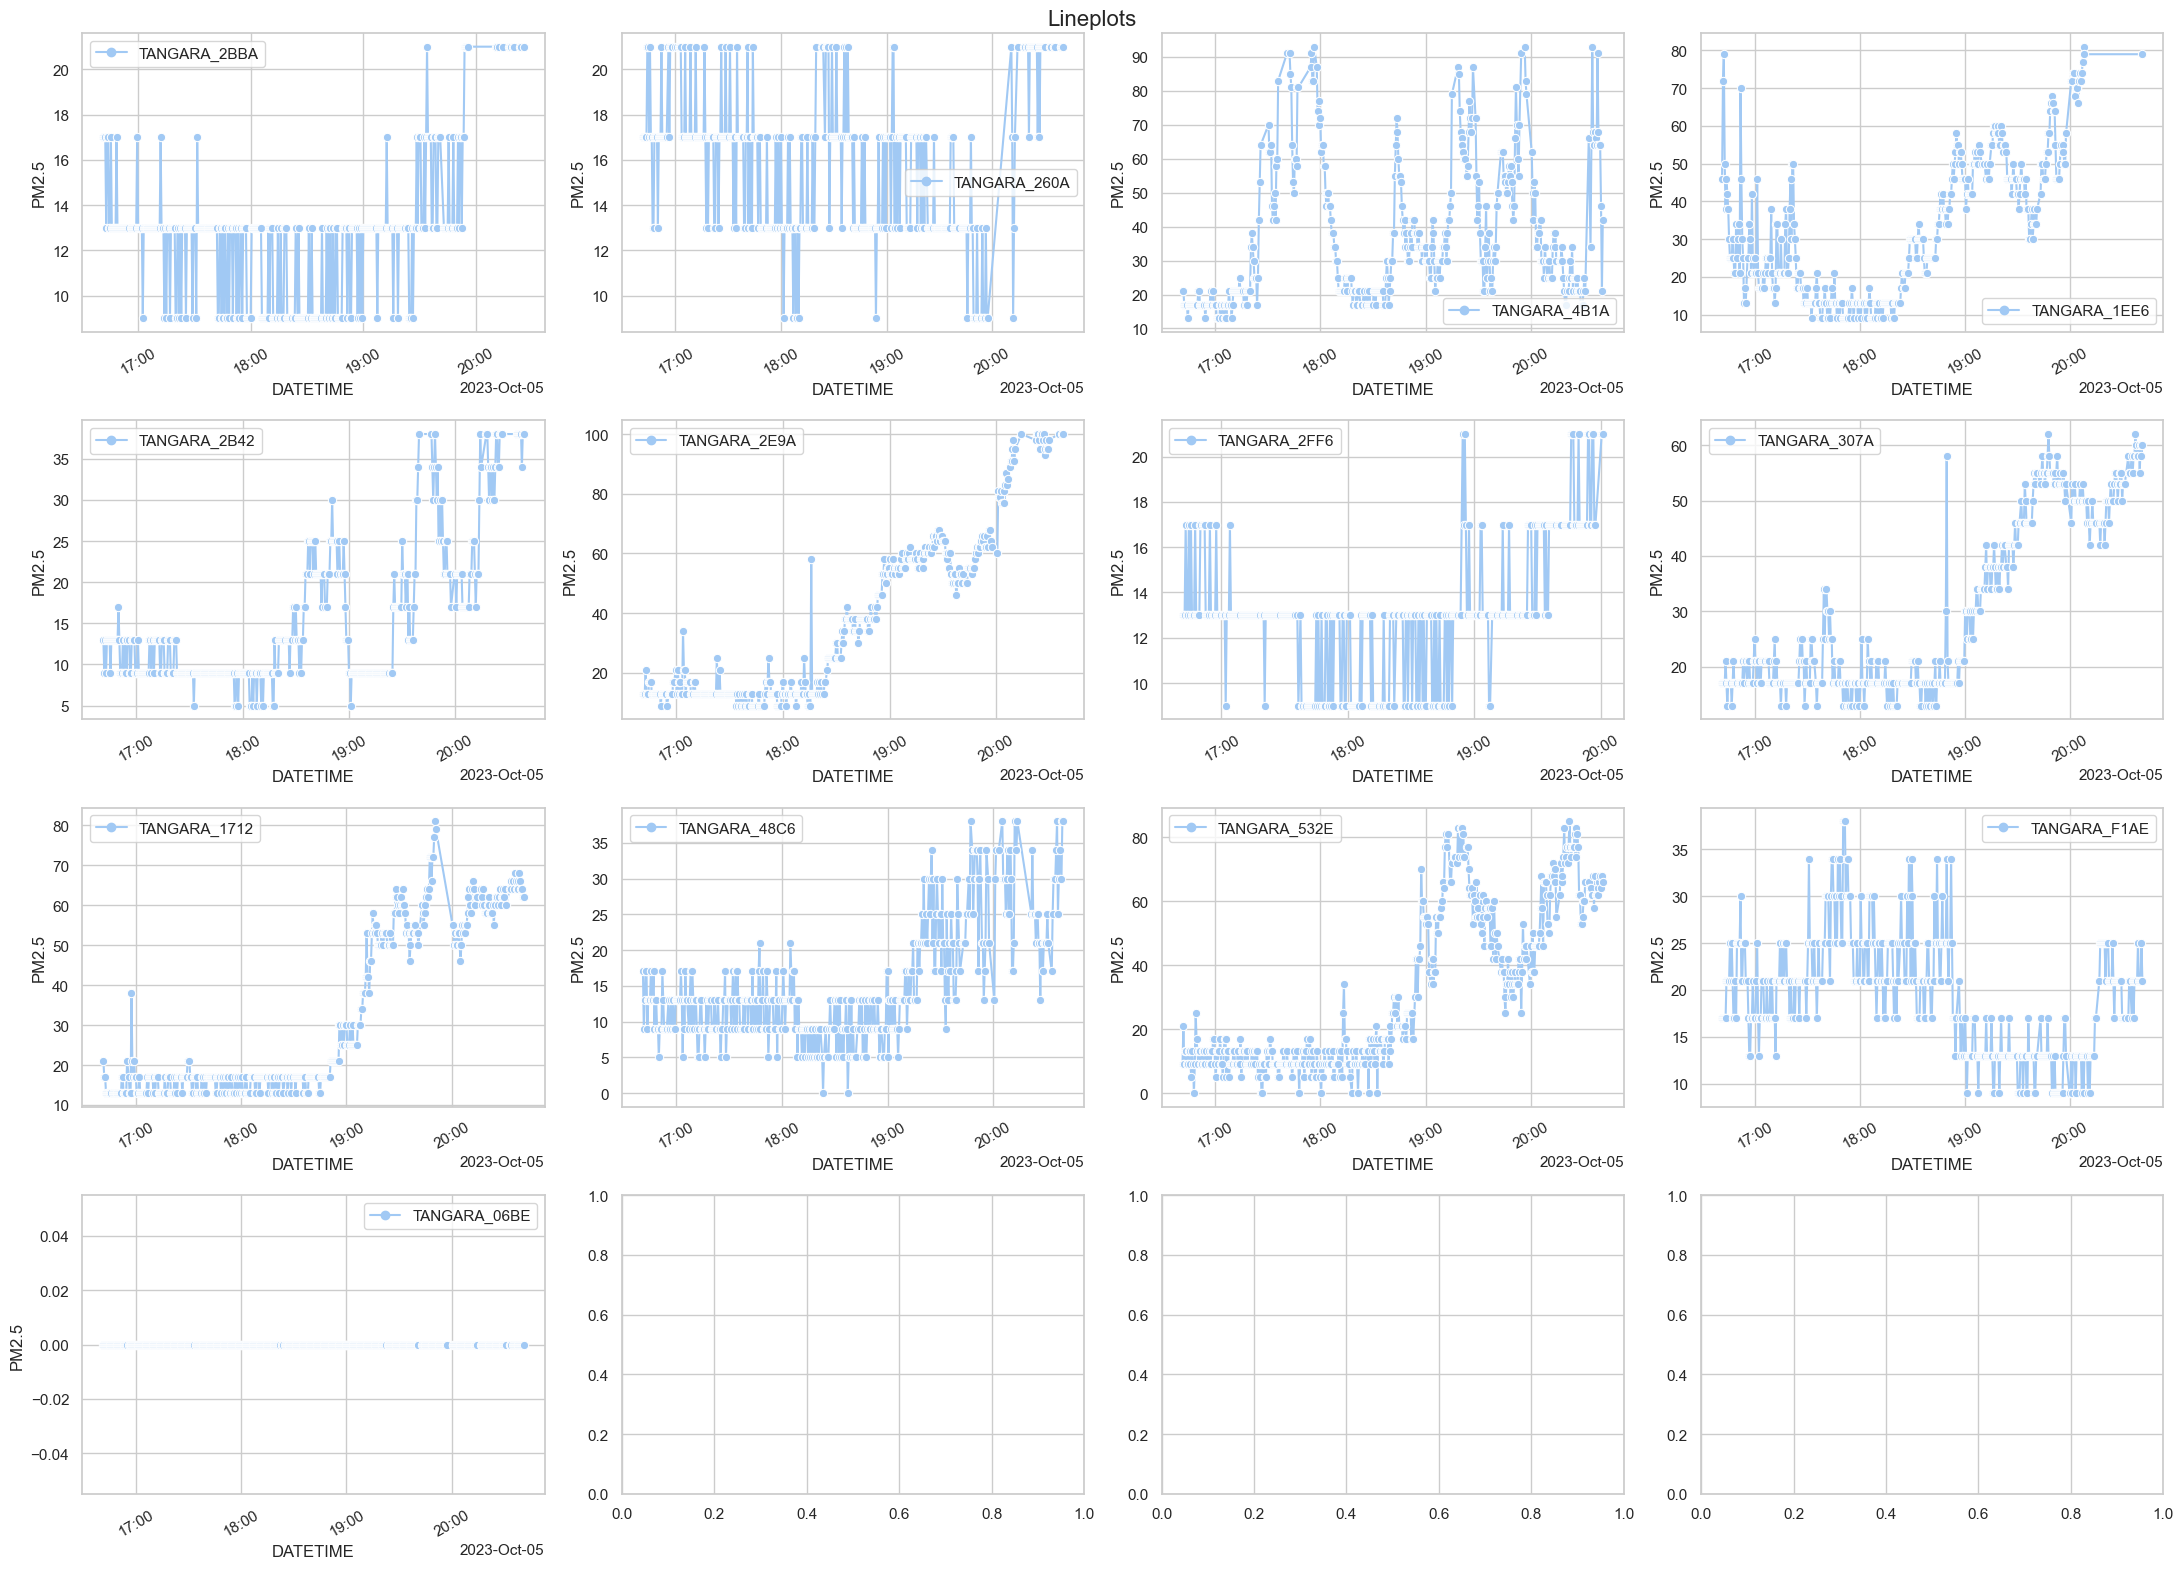

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')